In [1]:
from Neuron import *
from Layers import *
import matplotlib.pyplot as plt
import numpy as np

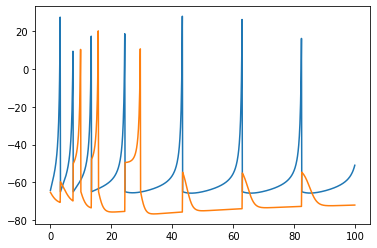

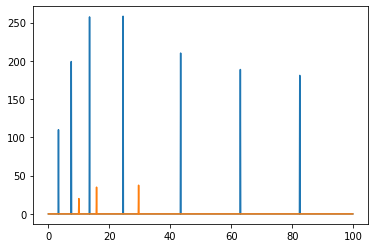

In [2]:
in_neu = IzhikevichNeuron(g=110)
out_neu = IzhikevichNeuron()
time = 100
in_neu.I = 10
in_impulse_hist = []
in_voltage_hist = []
out_impulse_hist = []
out_voltage_hist = []
for i in range(int(time//.1)+1):
    in_impulse, in_voltage = in_neu.behave()
    out_neu.apply_current(in_impulse)
    out_impulse, out_voltage = out_neu.behave()
    in_impulse_hist.append(in_impulse)
    in_voltage_hist.append(in_voltage)
    out_impulse_hist.append(out_impulse)
    out_voltage_hist.append(out_voltage)

x_axis = np.arange(len(in_impulse_hist)) * .1
fig = plt.figure()
plt.plot(x_axis, in_voltage_hist)
plt.plot(x_axis,out_voltage_hist)
plt.show()
fig = plt.figure()
plt.plot(x_axis,in_impulse_hist)
plt.plot(x_axis,out_impulse_hist)
plt.show()


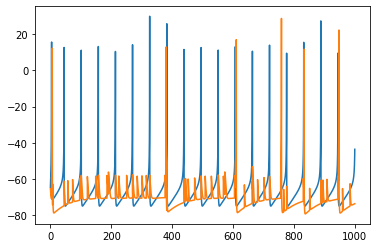

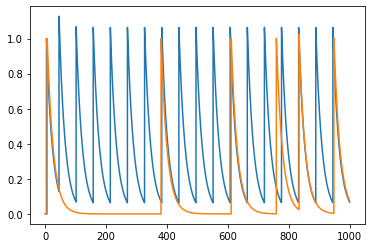

In [13]:
lr=1e-3
signal = np.array([5,6,7,8])
out_layer = Output_layer(num_exc=1, learning_rate=lr)
in_layer = Input_layer(out_layer, num_exc=len(signal), learning_rate=lr)
in_layer.make_connections()
in_layer.accept_signal(signal)

target=0
time = 1000
voltin = []
imin = []
voltout = []
imout = []

for i in range(int(time//.1)+1):
    in_layer.transmit_current()
    impulse, voltage = out_layer.simulation(target, 0)
    voltin.append(in_layer[-1].v)
    imin.append(in_layer[-1].impulse)
    voltout.append(voltage)
    imout.append(out_layer[0].impulse)
    out_layer.drop_impulse()

x_axis = np.arange(len(imout)) * .1
fig = plt.figure()
plt.plot(x_axis, voltin)
plt.plot(x_axis, voltout)
plt.show()
plt.plot(x_axis, imin)
plt.plot(x_axis, imout)
plt.show()

In [11]:
np.random.seed(42)
signal = np.arange(100)*.1
out_layer = Output_layer(num_exc=2, learning_rate=.1)
hid = Hidden_layer(out_layer, num_exc=100, learning_rate=.1, g=10)
hid.make_connections()
in_layer = Input_layer(hid, num_exc=len(signal), learning_rate=.1, g=10)
in_layer.make_connections()

in_layer.accept_signal(signal)

target = 0
time = 100
impulse_out = []
voltage_out = []
imout1 = []
volout1 = []
impulse_hid = []
voltage_hid = []
impulse_in = []
voltage_in = []
who0 = []
who1 = []
wih0 = []
wihlast = []

for i in range(int(time//.1)+1):
    in_layer.transmit_current()
    hid.transmit_current()
    impulse, voltage = out_layer.simulation(target, 10)
    impulse_out.append(impulse[target])
    voltage_out.append(voltage[target])
    imout1.append(impulse[1])
    volout1.append(voltage[1])
    impulse_hid.append(hid[0].I)
    voltage_hid.append(hid[0].v)
    impulse_in.append(in_layer[50].I)
    voltage_in.append(in_layer[50].v)
    who0.append(hid[0].connections[0])
    who1.append(hid[0].connections[1])
    wih0.append(in_layer[0].connections[10])
    wihlast.append(in_layer[-1].connections[10])
    hid.drop_impulse()
    out_layer.drop_impulse()




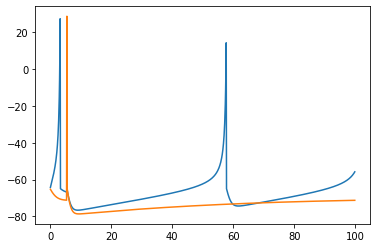

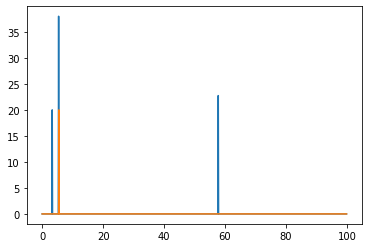

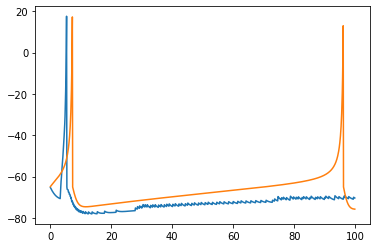

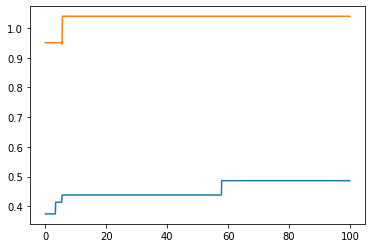

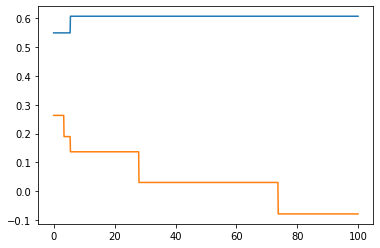

In [12]:
x_axis = np.arange(len(impulse_out)) * .1
fig = plt.figure()
plt.plot(x_axis, voltage_out)
plt.plot(x_axis, volout1)
fig = plt.figure()
plt.plot(x_axis, impulse_out)
plt.plot(x_axis, imout1)
fig = plt.figure()
plt.plot(x_axis, voltage_hid)
plt.plot(x_axis, voltage_in)
fig = plt.figure()
plt.plot(x_axis, who0)
plt.plot(x_axis, who1)
fig = plt.figure()
plt.plot(x_axis, wih0)
plt.plot(x_axis, wihlast)
plt.show()

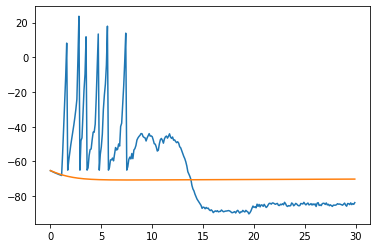

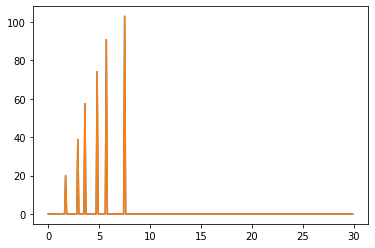

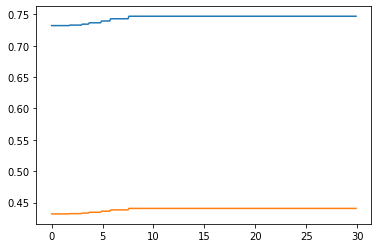

({0: 0.3821591156252584, 1: 0.9700539949312109}, {0: <Neuron.IzhikevichNeuron object at 0x000001A32B0D2530>, 1: <Neuron.IzhikevichNeuron object at 0x000001A32B0D2590>})


In [10]:
np.random.seed(42)
signal = np.arange(28*28)*.05
out_layer = Output_layer(num_exc=2, learning_rate=.001)
in_layer = Input_layer(out_layer, num_exc=len(signal), learning_rate=.001, g=2)
in_layer.make_connections()
connections, objects = in_layer[0].params()
in_layer.accept_signal(signal)

target = 0

time = 30
impulse_history = []
voltage_history = []
impulse9 = []
voltage9 = []
w1_hist = []
w9_hist = []

for i in range(int(time//.1)+1):
    in_layer.transmit_current()
    impulse, voltage = out_layer.simulation(target, 0)
    impulse_history.append(impulse[target])
    voltage_history.append(voltage[target])
    impulse9.append(impulse[1])
    voltage9.append(in_layer[9].v)
    w1_hist.append(in_layer[1].connections[target])
    w9_hist.append(in_layer[9].connections[target])
    out_layer.drop_impulse()

x_axis = np.arange(len(impulse_history)) * .1
fig = plt.figure()
plt.plot(x_axis, voltage_history)
plt.plot(x_axis, voltage9)
fig = plt.figure()
plt.plot(x_axis, impulse_history)
plt.plot(x_axis, impulse9)
fig = plt.figure()
plt.plot(x_axis, w1_hist)
plt.plot(x_axis, w9_hist)
plt.show()

print(in_layer[0].params())